<a href="https://colab.research.google.com/github/Aquinate22/TST-Task-001/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - Data Science And Business Analytics Internship**

# Prediction using Supervised Machine Learning

### **Task 1:** Predict the percentage score of a student based on number of study hours

### **Author**: *Mitchelle A. Okubasu*



### **Introduction**

Regression is a supervised Machine Learning technique which is used to predict continuous values. It can broken down into 3 methods, namely;



*   Simple Linear Regression which is regression of Y on a single X and both should be continuous values.
*   Multiple Regression which is regression of Y on multiple Xs. All variables should be continuous values.
*   Logistic Regression which is used in classification problems and has discrete outputs.

In this task we will use Simple Linear Regression to predict the percentage score of a student who studies for 9.5 hours per day.



In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("Data imported successfully")

stud_data.head()


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The student dataset contains two features:
 - Hours - contains the hours a student spent studying
 - Scores - contains the score obtained by a student after studying x hours.

### **E.D.A**

In [5]:
# Summary of the dataset
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Statistical Summary
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: xlabel='Scores', ylabel='Count'>

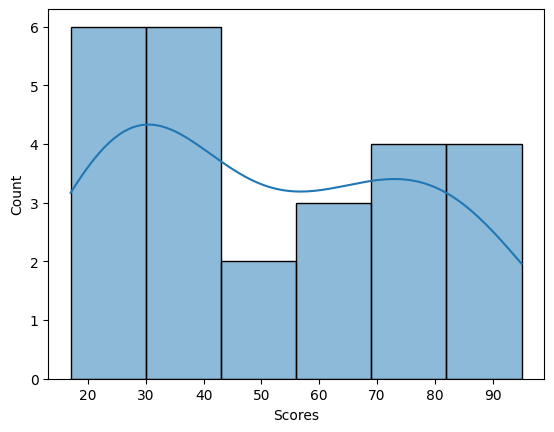

In [7]:
# Explore the distribution of the scores
sns.histplot(data=stud_data, x="Scores", kde=True)

<Axes: xlabel='Hours', ylabel='Count'>

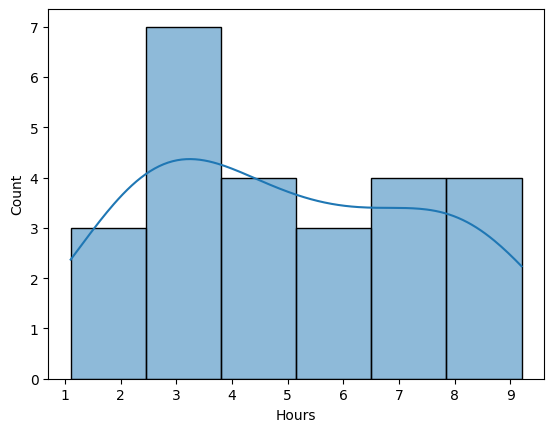

In [8]:
# Explore the distribution of the Hours studied
sns.histplot(data=stud_data, x="Hours", kde=True)

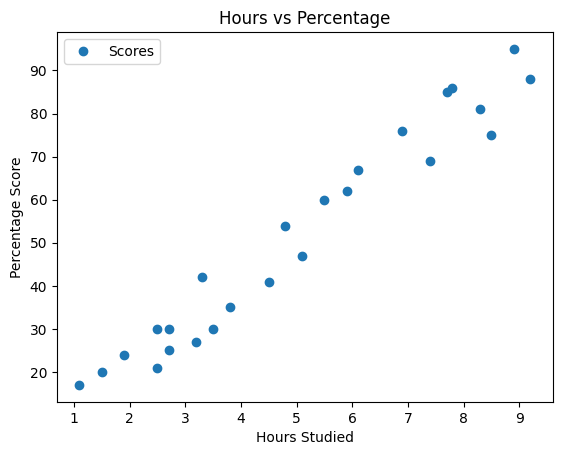

In [9]:
# Plotting the distribution of scores
stud_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

We observe that the data points are not a line but are in a line shape. Hence its linear.

### Identifying Features (X) and Target (y)

y is the dependent variable (the one you want to predict) - **Score**.

X is the independent variable (the one you use to make predictions) -  **Hours of study**.

In [10]:
X = stud_data.iloc[:, :-1].values  # Selects all rows and all columns except the last one
y = stud_data.iloc[:, 1].values    # Selects all rows and the second column

### Performing Train-Test split

In [11]:
# Import train-test split library
from sklearn.model_selection import train_test_split

# Creating train and test data using random state 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20,)
y_test shape: (5,)


### Building a Linear regression model

In [13]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Instantiate the model
regressor = LinearRegression()

### Fitting and evaluating the model on train set

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

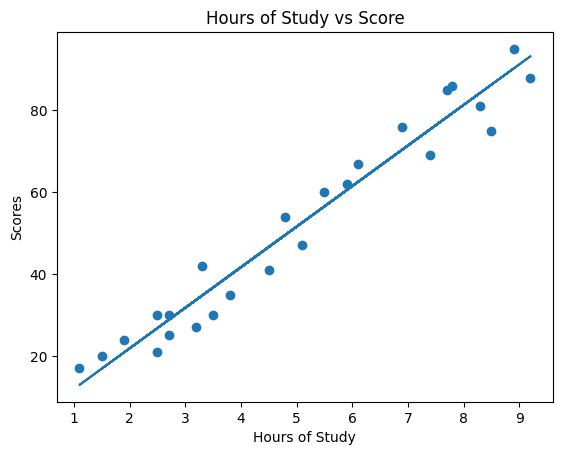

In [15]:
# Plotting the regression line
# Y = b0 + b1 * X
# b0 is the intercept (bias) term.
# b1 is the coefficient for the predictor variable.

line = regressor.intercept_ + regressor.coef_*X

# Plotting
plt.scatter(X, y)
plt.plot(X, line)
plt.title('Hours of Study vs Score')
plt.xlabel('Hours of Study')
plt.ylabel('Scores');
plt.show()

Increase in percentage score as hours of study increase

In [16]:
# Generating predictions using the model

y_pred = regressor.predict(X_test) #  We are predicting the Scores of the hours of study in X_test

Evaluating the model using the following evaluation metrics
 -

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 21.598769307217456


An MSE of approximately 21.59 suggests that, on average, the squared differences between the actual and predicted values are relatively small

In [18]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 4.647447612100373


RMSE is calculated by taking the square root of MSE.

 RMSE of approximately 4.64 suggests that, on average, the predicted values differ from the actual values by approximately 4.51 units.

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


R-squared (R²): 0.9454906892105354


R² ranges from 0 to 1.

 A higher R² value indicates a better fit of the model to the data, with 1 representing a perfect fit. An R² value of approximately 0.94 is typically considered very good as the model is not overfitting.

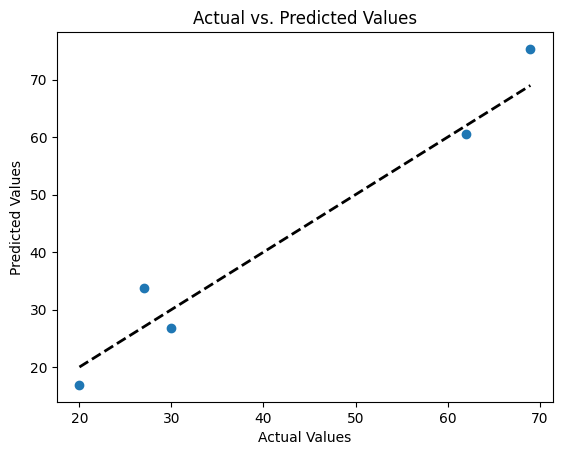

In [20]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [21]:
# Prepare a scalar value for prediction
scalar_value = 9.5
input_data = np.array([scalar_value]).reshape(-1, 1)

# Make a prediction
prediction = regressor.predict(input_data)
print("The percentage score of a student who studied 9.5 hrs/day is:", prediction)



The percentage score of a student who studied 9.5 hrs/day is: [96.16939661]
